# Análise Fatorial Exploratória

## O que é?

Vamos começar tentando entender de forma simples o que é Análise Fatorial.

Considere o seguinte exemplo, uma pessoa está analisando dados e descobre que as variáveis "venda de sorvete" e "número de afogamentos" estão altamente correlacionadas. Esse é um famoso exemplo da chamada correlação espúria.

Os dados não mentem, há uma correlação entre as variáveis! O termo "espúria" decorre do fato de muitas pessoas confundirem correlação com causalidade (isto é muito feio!). Tais pessoas poderiam imaginar que a proibição da venda de sorvetes salvaria muitas vítimas de afogamento, o que é claro não faz nenhum sentido!

É natural surgir o seguinte questionamento: essa correlação é uma mera coincidência ou há algo mais a ser investigado?

Neste exemplo, claramente existe uma terceira variável "temperatura" que está afetando as variáveis "venda de sorvete" e "número de afogamentos", pois quanto mais calor mais pessoas tendem a tomar sorvete e irem às praias ou piscinas. Se a variável "temperatura" não consta nos dados então ela é um fator oculto ao analista, mas muito relevante para o problema.

Esse tipo de variável oculta recebe o nome de "variável latente" ou simplesmente "fator".


Então, resumidamente, podemos dizer que a análise fatorial consiste em tentarmos identificar quantos fatores estão influenciando a variabilidade de variáveis correlacionadas, com a vantagem de podermos trabalhar com os fatores ao invés dos dados originais, acarretando numa diminuição de variáveis (redução de dimensionalidade).

Atualmente com a grande quantidade de variáveis presentes nas análises de dados, métodos de redução de dimensionalidade são muito utilizados, como a análise fatorial. Essa redução de dimensionalidade também pode ser encarada como uma técnica de seleção de variáveis.

## Como é feita?

Normalmente teremos que todas as variáveis de um conjunto de dados terão alguma correlação (mesmo que fraca) com todas as outra, e na análise fatorial agrupa-se conjunto de variáveis que tenham alta correlação entre si e pouca correlação com os demais conjuntos. Esses grupos são os fatores. Tudo isso é feito de modo a se minimizar a perda de informação que os fatores carregam em relação aos dados originais.

A análise fatorial baseia-se na variância das variáveis para encontrar os fatores. Mais especificamente, a variância de cada variável pode ser decomposta como uma soma de três variâncias:

* Variância Comum: variância que cada variável compartilha com as demais.

* Variância Específica (ou Única): variância que uma variável compartilha com uma outra variável específica.

* Variância Erro: variância que não pode ser explicada por correlações com outras variáveis.

## Pressupostos da Análise Fatorial

A análise fatorial baseia-se nos seguintes pressupostos:

* Variáveis correlacionadas;

* Uso apenas de variáveis quantitativas contínuas;

* Existência de mais observações que variáveis;

* Dados sem outliers.


Em geral, os dados são padronizados numa mesma pela distribuição normal  para os cálculos de correlação!

Para testar se as variáveis estão correlacionadas, usaremos o **teste de esfericidade de Bartlett** para testar a hipótese nula. Um valor elevado da estatística de teste favorece a rejeição da hipótese nula.

$H_0$: A matriz de correlação da população é uma matriz identidade, ou seja, as variáveis não são correlacionadas na população.

$H_1$: A matriz de correlação da população não é uma matriz identidade, ou seja as variáveis são correlacionadas na população.

Chega de teoria! Vamos meter a mão no código! Para isso vamos importar o nosso conjunto de dados de cidades, colocar os dados numa mesma escala e observar a correlação entre as variáveis.

In [1]:
# importando pandas
import pandas as pd

In [2]:
# importando os dados
df = pd.read_excel('Fonte dos Dados.xlsx')
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,...,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538.0,6.93,52.92,43.04,4.04,48.34,0.00,75.34,...,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072.0,1.22,55.58,40.07,4.35,65.30,2.39,66.83,...,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398.0,5.46,51.88,42.76,5.37,70.02,21.27,70.67,...,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471.0,2.79,52.71,42.60,4.69,44.07,0.16,71.05,...,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798.0,5.17,53.92,41.92,4.16,44.60,0.82,77.90,...,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


Selecione para está análise apenas as variáveis `Densidade demográfica, Porcentagem de Jovens, Porcentagem de Idosos, Taxa de Urbanização, Taxa de Saneamento Básico, PIB Municipal,% de pobres, IDH, Média Salarial e Taxa de desemprego`.

In [3]:
# selecionando apenas as variáveis pedidas
df = df[['Densidade demográfica', 'Porcentagem de Jovens',
       'Porcentagem de Idosos', 'Taxa de Urbanização',
       'Taxa de Saneamento Básico', 'PIB Municipal','% de pobres',
        'IDH', 'Média Salarial', 'Taxa de desemprego']]
df.head()

,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego
0,6.93,52.92,4.04,48.34,0.00,1.221749e+08,36.56,0.81,994.67,9.62
1,1.22,55.58,4.35,65.30,2.39,4.205170e+07,44.09,0.77,1163.49,7.44
2,5.46,51.88,5.37,70.02,21.27,1.906333e+08,35.22,0.77,818.65,5.96
3,2.79,52.71,4.69,44.07,0.16,8.616439e+07,37.61,0.77,897.30,3.41
4,5.17,53.92,4.16,44.60,0.82,1.083468e+08,35.00,0.79,843.49,4.14


In [4]:
# importando StandardScaler
from sklearn.preprocessing import StandardScaler

# instanciando a função
scaler = StandardScaler()

# criando uma cópia dos valores
df_scaled = df.copy()

# aplicando a padronização
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

df_scaled.head()

,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego
0,-0.177145,1.505067,-1.788399,-0.766329,-0.949896,-0.078259,0.745417,0.178348,0.078257,0.829827
1,-0.187115,1.916300,-1.662315,0.024632,-0.874859,-0.089140,1.165757,-0.715198,0.519885,0.249978
2,-0.179712,1.344285,-1.247458,0.244758,-0.282103,-0.068963,0.670615,-0.715198,-0.382206,-0.143682
3,-0.184374,1.472602,-1.524029,-0.965468,-0.944872,-0.083149,0.804030,-0.715198,-0.176460,-0.821946
4,-0.180218,1.659666,-1.739592,-0.940751,-0.924151,-0.080137,0.658334,-0.268425,-0.317225,-0.627776


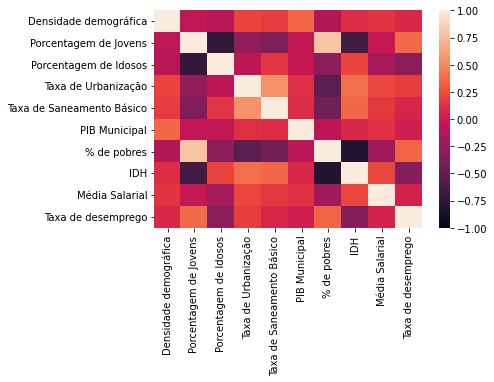

In [5]:
# importando seaborn e plotando heatmap
import seaborn as sns
sns.heatmap(df_scaled.corr(), vmin=-1, vmax=1, annot=False);

## Teste de Esfericidade de Bartlett

A hipótese nula é que as variáveis não são correlacionadas. Olhando o heatmap podemos acreditar que está hipótese não é verdadeira, mas precisamos checá-la com rigor e para isso usaremos o teste de Bartlett.

Para realizar esse teste em `Python` usaremos a função `calculate_bartlett_sphericity` do pacote `factor_analyzer`.

**Atenção!** Este pacote não vem instalado por padrão! Para instalá-lo use o comando `!pip install factor_analyzer`.

A função que desejamos está no pacote `factor_analyzer` dentro do módulo `factor_analyzer`.

Para mais detalhes consulte a documentação do pacote [aqui](https://factor-analyzer.readthedocs.io/en/latest/index.html).

Está função retornará para nós dois valores: a estatística qui quadrado do teste e o p-valor. Consideraremos um nível de significância de 5%.


In [6]:
#!pip install factor_analyzer

In [7]:
# importando a funcao e realizando o teste
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square, p_valor = calculate_bartlett_sphericity(df_scaled)
print(f"A estatística do teste é {chi_square} e seu respectivo p-valor é {p_valor}")

A estatística do teste é 28641.476094542522 e seu respectivo p-valor é 0.0


Como o p valor é menor que 0.05 podemos rejeitar a hipótese nula, isto é, podemos considerar que há correlação entre todas as variáveis.

Portanto, podemos proceder com a análise fatorial.

### Medida de Kaiser-Meyer-Olkin (KMO)

A medida de adequacidade da amostra de Kaiser-Meyer-Olkin (KMO) compara as magnitudes dos coeficientes de correlação observados com as magnitudes dos coeficientes de correlação parcial.

Pequenos valores de KMO indicam que as correlações entre os pares de variáveis não podem ser explicadas por outras variáveis, indicando que a análise fatorial não é adequada.
KMO sempre varia entre 0 e 1, quanto maior melhor. Resultados abaixo de 0.5 indicam que análise fatorial não é adequada.


In [8]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_scaled)
kmo_model

0.656920246450649

Como o valor é alto, podemos proceder com a análise fatorial.

## Próximos Passos 

Agora que sabemos que a análise fatorial é adequada para ser usada em nosso caso, vamos realizar os seguintes passos:

* Encontrar a quantidade ideal de fatores;

* Rotacionar os fatores para facilitar suas interpretações.


Para encontrar a quantidade de fatores, vamos olhar para os autovalores da matriz cargas fatoriais. Se o autovalor for maior que 1 então consideramos aquele fator como relevante.

Para isso vamos usar a função `FactorAnalyzer` e o método `get_eigenvalues()` aplicado ao um objeto da classe `FactorAnalyzer`, após este calcular valores dos dados.

O método `get_eigenvalues()` retorna dois objetos, sendo que o primeiro são os autovalores.

In [9]:
# importando a função FactorAnalyzer
from factor_analyzer import FactorAnalyzer

# criando um objeto para fazer análise fatorial
fa = FactorAnalyzer(rotation=None)

# aplicando a análise fatorial aos dados
fa.fit(df_scaled)

# obtendo os autovalores
ev, v = fa.get_eigenvalues()
ev

array([3.47130392, 1.94009422, 1.14442115, 1.01436115, 0.70414831,
       0.62123327, 0.52194749, 0.35596044, 0.17421863, 0.05231141])

Note que temos apenas 4 autovalores maiores que 1, portanto temos 4 fatores para os nosso dados. Um dos valores é bem próximo de 1, então poderíamos também considerar 3 fatores. Essa escolha vai depender também de cada problema de negócio.

Uma quantidade muito grande de valores pode tornar difícil essa leitura, portanto vamos usar um gráfico para facilitar.

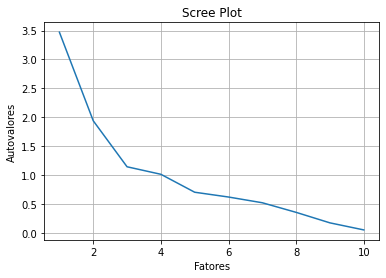

In [10]:
# importando matplotlib para fazer algumas customizações no gráfico
import matplotlib.pyplot as plt

# Criando um scree plot
sns.lineplot(x=range(1, df_scaled.shape[1]+1), y=ev)
plt.title('Scree Plot')
plt.xlabel('Fatores')
plt.ylabel('Autovalores')
plt.grid();

Podemos ver que há apenas 4 fatores que possuem autovalor maior que 1.

Podemos também calcular a variância explicada por cada fator e a variância explicada cumulativa.

Para isso vamos usar o método `get_factor_variance()` aplicado ao nosso objetivo usado na realização da análise fatorial.

In [11]:
# criando um objeto para fazer análise fatorial com 4 fatores
fa = FactorAnalyzer(n_factors=4, rotation=None)

# aplicando a análise fatorial aos dados
fa.fit(df_scaled)

# criando nome para as colunas do DataFrame de cargas fatoriais
colunas = []
for i in range(4):
  colunas.append('Fator ' + str(i))

# criando DataFrame para auxiliar a visualização do resultado
variancia_fator = pd.DataFrame(fa.get_factor_variance(),
                   index=['Variância','Variância Proporcional','Variância Acumulada'],
                   columns=colunas)

variancia_fator

,Fator 0,Fator 1,Fator 2,Fator 3
Variância,3.272281,1.555935,0.647111,0.582000
Variância Proporcional,0.327228,0.155594,0.064711,0.058200
Variância Acumulada,0.327228,0.482822,0.547533,0.605733


Podemos ver que os 4 fatores podem explicar cerca de 60% da variabilidade dos dados.

### Comunalidades

Comunalidade é a proporção da variância de cada variável que pode ser explicada pelos fatores. Rotação não tem influência nas comunalidades.

Podemos obter as comunalidades usando a função `get_communalities()` do pacote `factor_analysis`.

In [12]:
pd.DataFrame(fa.get_communalities(),
             index=df_scaled.columns,
             columns=['Comunalidades'])

,Comunalidades
Densidade demográfica,0.338274
Porcentagem de Jovens,0.913061
Porcentagem de Idosos,0.947024
Taxa de Urbanização,0.761128
Taxa de Saneamento Básico,0.439540
PIB Municipal,0.410090
% de pobres,0.958491
IDH,0.731538
Média Salarial,0.151076
Taxa de desemprego,0.407106


Por exemplo, podemos considerar que 76% da variância da Taxa de Urbanização é explicada por todos os fatores juntos.

### Rotação

Agora que sabemos que temos 4 fatores, vamos rotacioná-los para conseguir ter uma melhor interpretação desses fatores. Para obter essa melhor interpretação a rotação tende a representar os fatores de forma não correlacionada.

Há vários métodos de rotação, vamos mostrar a seguir o método Varimax. Esse processo pode ser feito de forma simples ao passar para a função `FactorAnalyzer()` os parâmetros de interesse, que no nosso caso são `n_factors=4` e `rotation='varimax`.

Após expor nosso objeto aos dados, vamos acessar o atributo `loadinds_` que possui as cargas fatoriais.

In [13]:
# realizando a análise fatorial com rotação
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(df_scaled)

# criando DataFrame de cargas fatoriais
cargas_fat = pd.DataFrame(fa.loadings_,
                          index=df_scaled.columns,
                          columns=colunas)
cargas_fat

,Fator 0,Fator 1,Fator 2,Fator 3
Densidade demográfica,-0.000830,0.170434,0.052904,0.553558
Porcentagem de Jovens,0.693588,-0.290785,0.586779,-0.055956
Porcentagem de Idosos,-0.261607,0.004807,-0.934732,-0.069566
Taxa de Urbanização,-0.109708,0.849707,0.100120,0.130638
Taxa de Saneamento Básico,-0.142979,0.618555,-0.122563,0.146510
PIB Municipal,-0.020036,0.030013,0.009905,0.639288
% de pobres,0.840688,-0.489699,0.086863,-0.066221
IDH,-0.768267,0.361387,-0.026759,0.099937
Média Salarial,-0.135998,0.217118,0.220094,0.192350
Taxa de desemprego,0.552788,0.269483,0.158339,0.061959


Cargas fatoriais indicam quanto um fator explica uma variável. Esses valores variam de -1 a 1. Quanto mais próximo de -1 ou de 1, mais o fator explica a variável.

Vamos estabelecer um valor de corte para poder entender quais fatores explicam quais variáveis. Vamos considerar que esse valor de corte será 0.5.

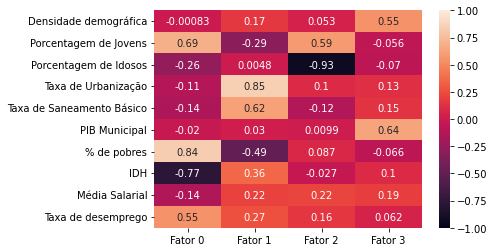

In [14]:
# observando o valor das cargas fatoriais com heatmap
sns.heatmap(cargas_fat, vmin=-1, vmax=1, annot=True);

Como temos muitas variáveis, fica ruim anotar qual variável é influenciada por cada fator. Assim, vamos usar um pouco de programação para facilitar nossa vida. Vamos criar um dicionário que armazene na chave os fatores e nos valores armazene as variáveis que são influenciadas por aquele fator.

In [15]:
# criando o dicionário
fatores_variaveis = {}

# preenchendo o dicionário
for i in range(4):
  fatores_variaveis['Fator ' + str(i)] = cargas_fat[cargas_fat.iloc[:,i] > 0.5].iloc[:,i].index.tolist()

fatores_variaveis

{'Fator 0': ['Porcentagem de Jovens', '% de pobres', 'Taxa de desemprego'],
 'Fator 1': ['Taxa de Urbanização', 'Taxa de Saneamento Básico'],
 'Fator 2': ['Porcentagem de Jovens'],
 'Fator 3': ['Densidade demográfica', 'PIB Municipal']}

Podemos ver que o fator 0 explica as variáveis `Porcentagem de jovens`, `% de pobres` e `Taxa de desemprego`; o fator 1 explica as variáveis `Taxa de Urbanização` e `Taxa de Saneamento Básico`; o fator 2 explica a variável `Porcentagem de Jovens`; e o fator 3 explica as variáveis `Densidade Demográfica` e `PIB Municipal`.

Portanto, podemos criar uma identificação destes fatores:

* Fator 0: Economia do Município

* Fator 1: Desenvolvimento do Município

* Fator 2: Porcentagem de Jovens

* Fator 3: Tamanho do Município